In [24]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [25]:
import pathlib
data_dir = pathlib.Path('C:\\Users\\icosane\\Desktop\\New folder\\roessler_lorenz2_lorenz').with_suffix('')

In [26]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

1820


In [27]:
xy = list(data_dir.glob('xy/*'))
#PIL.Image.open(str(xy[0]))

In [28]:
batch_size = 32
img_height = 554
img_width = 413

In [29]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1820 files belonging to 4 classes.
Using 1456 files for training.


In [30]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1820 files belonging to 4 classes.
Using 364 files for validation.


In [31]:
class_names = train_ds.class_names
print(class_names)

['lorenz zx', 'lorenz2 xy', 'lorenz2 zy', 'roessler yx']


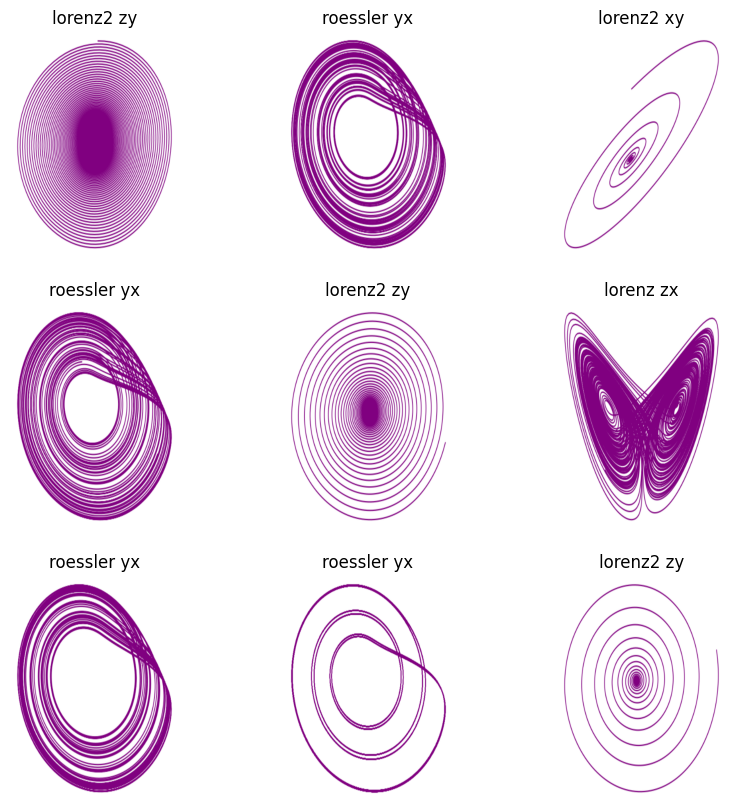

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [33]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [34]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [35]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [36]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
num_classes = 4

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [38]:
#tf.keras.utils.plot_model(model, to_file="model.png",
           #expand_nested=True, show_shapes=True)

In [39]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [40]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=4
)

Epoch 1/4


46/46 [==============================] - 153s 3s/step - loss: 1.8042 - accuracy: 0.7198 - val_loss: 0.0540 - val_accuracy: 1.0000
Epoch 2/4
46/46 [==============================] - 148s 3s/step - loss: 0.0489 - accuracy: 0.9897 - val_loss: 8.1569e-04 - val_accuracy: 1.0000
Epoch 3/4
46/46 [==============================] - 148s 3s/step - loss: 0.0168 - accuracy: 0.9966 - val_loss: 7.7305e-04 - val_accuracy: 1.0000
Epoch 4/4
46/46 [==============================] - 148s 3s/step - loss: 0.0189 - accuracy: 0.9959 - val_loss: 9.7777e-04 - val_accuracy: 1.0000


In [61]:
model.evaluate(val_ds)

12/12 [==============================] - 6s 482ms/step - loss: 9.7777e-04 - accuracy: 1.0000


[0.0009777689119800925, 1.0]

In [62]:
for test_images, test_labels in val_ds.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  predictions2 = model.predict(test_images)


predictions.shape
predictions[1]
np.argmax(predictions[0])
test_labels[1]

1/1 [==============================] - 1s 537ms/step


1

In [43]:
print(predictions2)

[[ -4.239096   -73.74794     16.432793    55.309025  ]
 [  0.63079625   5.778474    -1.2684057  -10.435038  ]
 [ -7.5481896  -69.661804    11.205237    57.802185  ]
 [ -2.7189653   -2.024186     5.2156963   -3.1371617 ]
 [ -3.5980322   -2.007245     6.306076    -3.9200997 ]
 [ -9.837854   -41.120407     6.713758    34.833176  ]
 [ -2.0805123    6.6459904   -0.65058917  -8.962083  ]
 [ -2.6788752   -1.845088     5.858899    -4.1015134 ]
 [ -3.249416    -3.0668693    8.112584    -5.095851  ]
 [ 50.234848   -34.8732      -9.949541   -39.120007  ]
 [ -1.6447755   -3.1404283    7.3667784   -5.733586  ]
 [-11.267441   -52.707       14.705626    44.233875  ]
 [ -3.7552688  -12.990496    16.099855    -2.678856  ]
 [ 43.875362   -46.329227     0.22044341 -24.49847   ]
 [ -3.5455897    4.236534    -3.1012754   -7.1074514 ]
 [  3.3620217   10.608833    -3.7087696  -18.408451  ]
 [-14.457758   -50.15354      2.9012244   50.01254   ]
 [-12.6641245  -62.929764     7.291315    57.222706  ]
 [ -1.3313

In [63]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array = predictions_array[i]
  true_label = true_labels[i] 
  img = images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} ({})".format(class_names[predicted_label],                     
                                      class_names[true_label]),
                                      color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array = predictions_array[i]
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks([0,1,2,3,4,5,6,7,8,9])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

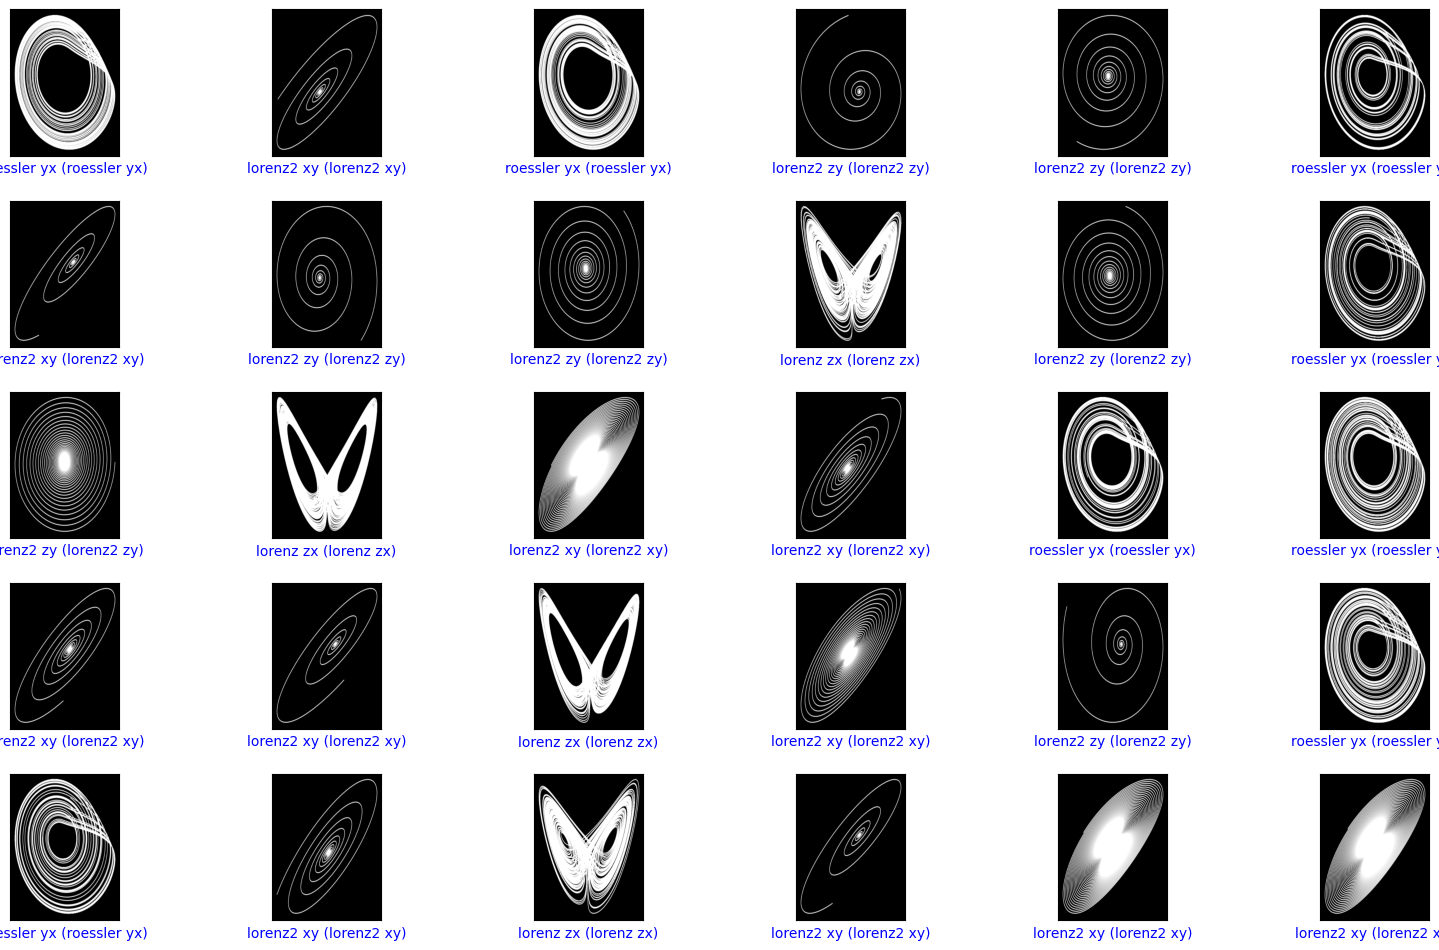

In [64]:
num_rows = 5
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_rows, 2*num_cols))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i + 1)
  plot_image(i, predictions, test_labels, test_images)

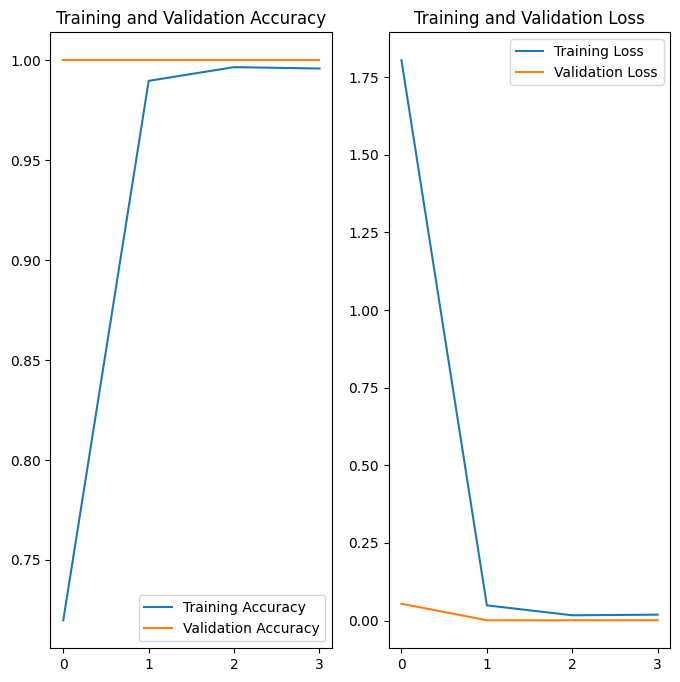

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(4)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

y_pred = model.predict(val_ds)
y_pred = np.argmax(y_pred, axis=1)

y_true = np.concatenate([y for x, y in val_ds], axis=0)
cr = classification_report(y_true, y_pred, output_dict=True, target_names=class_names)
pd.DataFrame.from_dict(cr)

12/12 [==============================] - 6s 479ms/step


,lorenz zx,lorenz2 xy,lorenz2 zy,roessler yx,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,75.0,110.0,96.0,83.0,1.0,364.0,364.0


1/1 [==============================] - 0s 48ms/step
This image most likely belongs to lorenz2 xy with a 95.21 percent confidence.


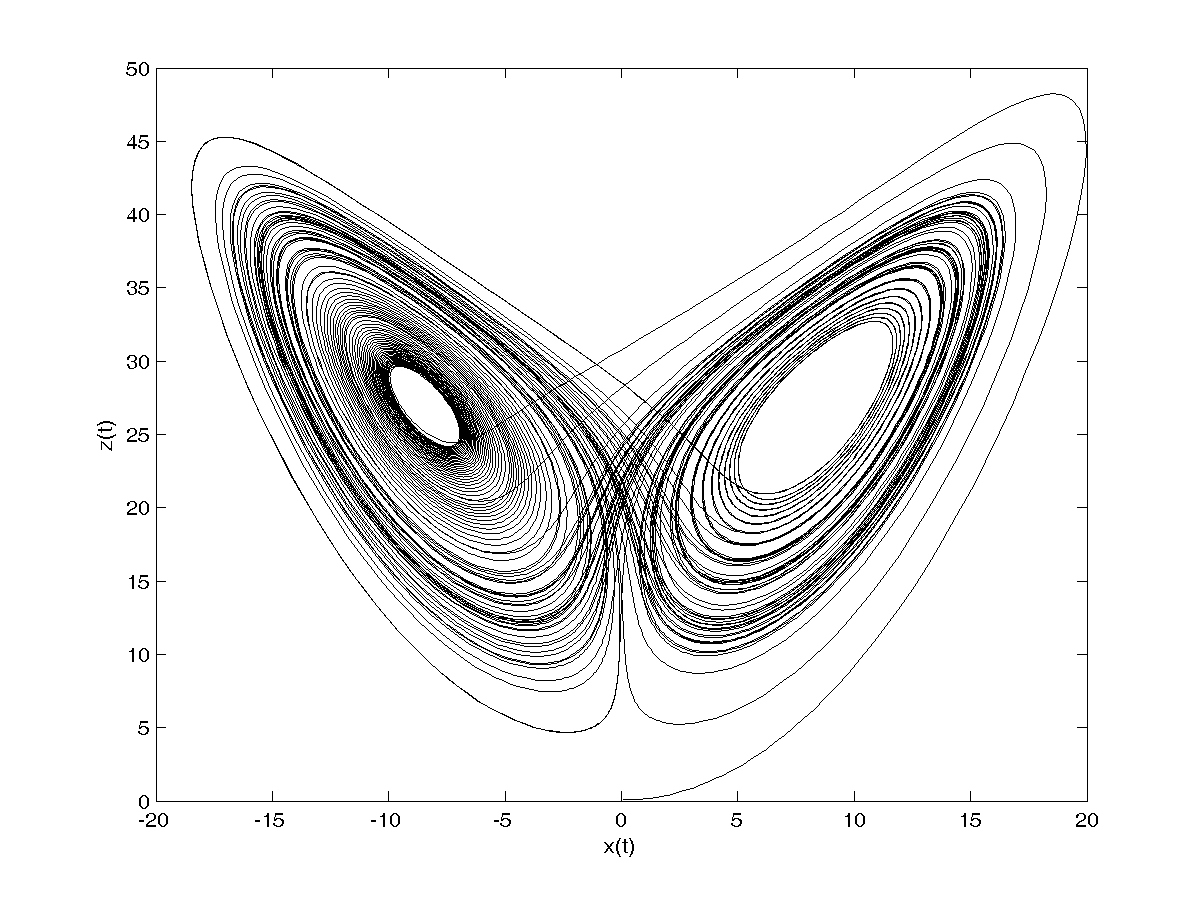

In [67]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\chen 2.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\chen 2.png') 

1/1 [==============================] - 0s 49ms/step
This image most likely belongs to lorenz2 xy with a 100.00 percent confidence.


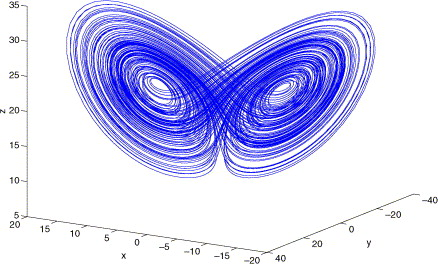

In [68]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\chen 1.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\chen 1.jpg') 

1/1 [==============================] - 0s 49ms/step
This image most likely belongs to roessler yx with a 100.00 percent confidence.


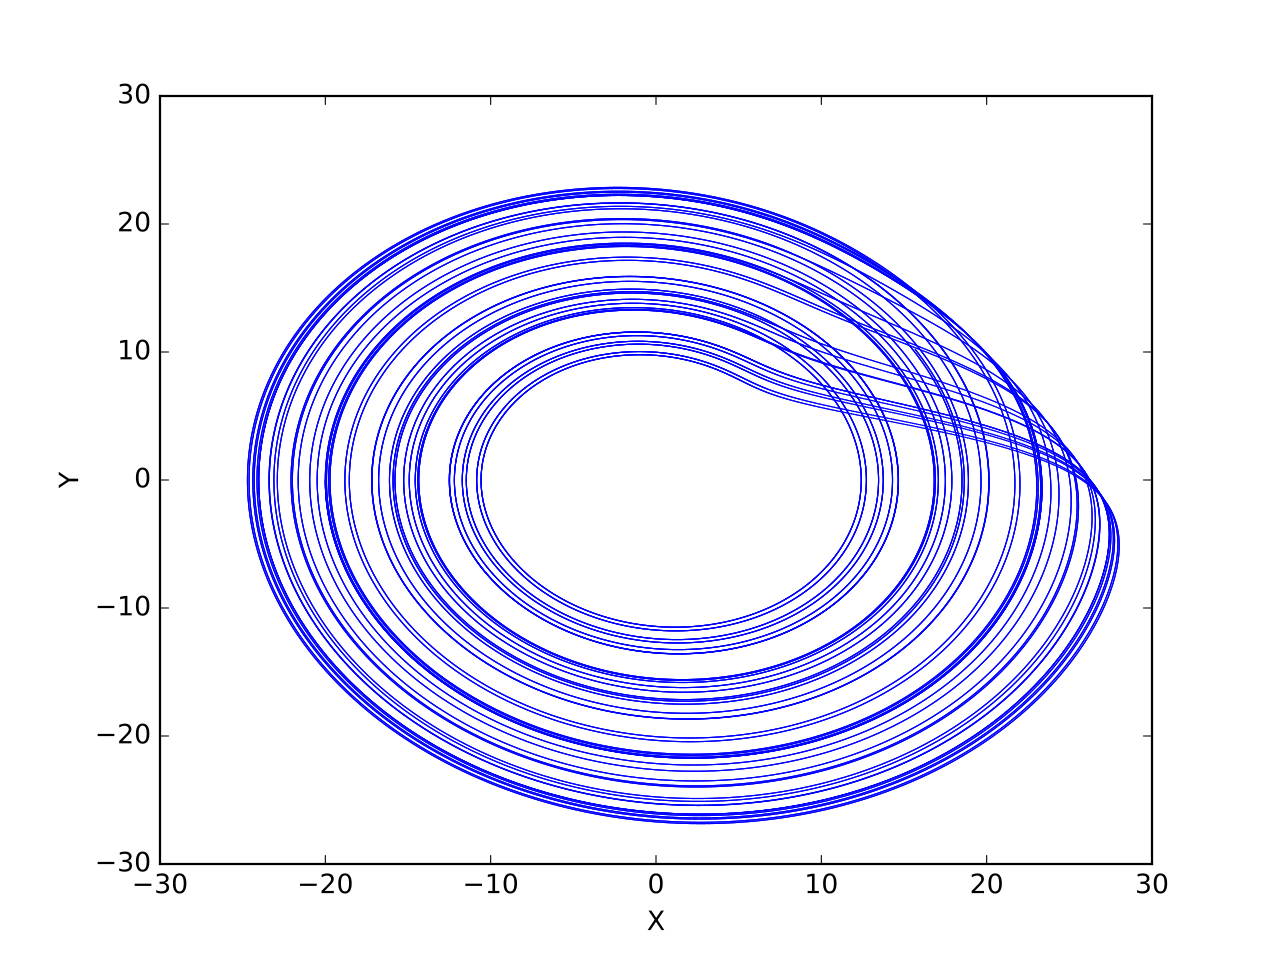

In [69]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 3.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 3.png') 

1/1 [==============================] - 0s 49ms/step
This image most likely belongs to lorenz2 xy with a 68.78 percent confidence.


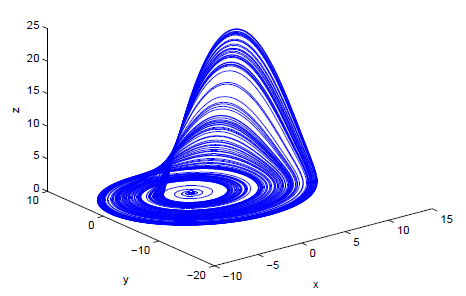

In [70]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 4.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 4.png') 

1/1 [==============================] - 0s 50ms/step
This image most likely belongs to lorenz2 zy with a 57.69 percent confidence.


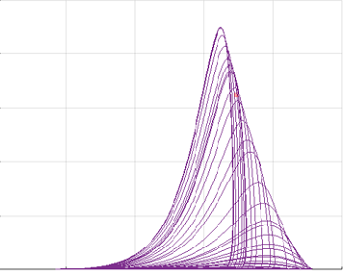

In [71]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 5.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 5.png') 

1/1 [==============================] - 0s 51ms/step
This image most likely belongs to lorenz2 zy with a 96.32 percent confidence.


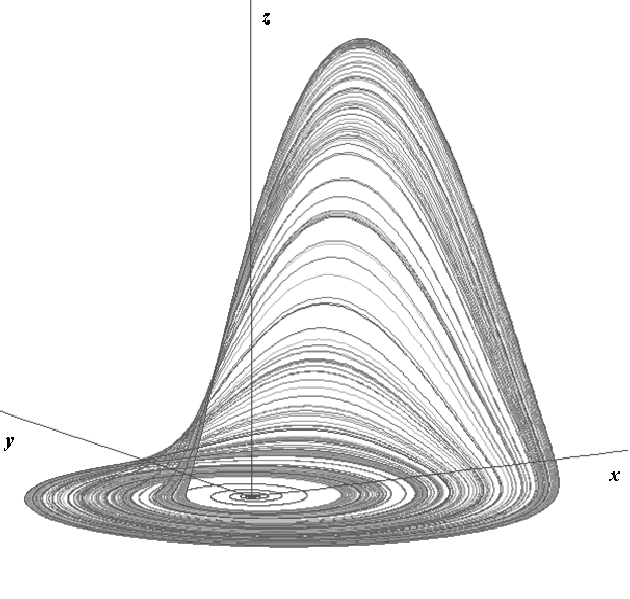

In [72]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 6.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 6.png') 

1/1 [==============================] - 0s 50ms/step
This image most likely belongs to lorenz2 zy with a 58.22 percent confidence.


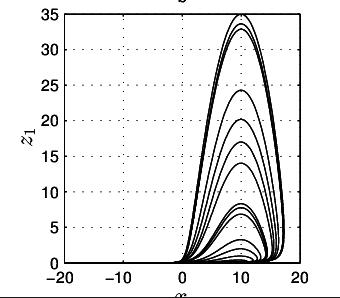

In [73]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 7.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 7.png') 

1/1 [==============================] - 0s 51ms/step
This image most likely belongs to lorenz2 zy with a 61.75 percent confidence.


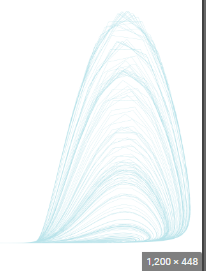

In [74]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 8.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\roessler 9.png') 

1/1 [==============================] - 0s 49ms/step
This image most likely belongs to roessler yx with a 88.37 percent confidence.


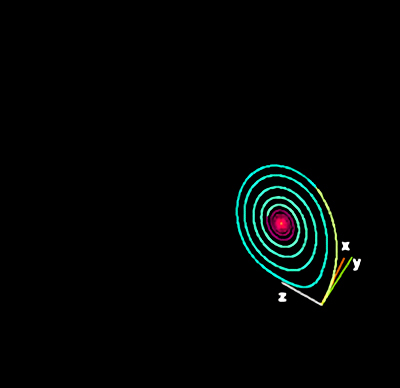

In [75]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\lorenz2 0_waifu2x_art_noise1_scale.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\lorenz2 0_waifu2x_art_noise1_scale.png') 

1/1 [==============================] - 0s 53ms/step
This image most likely belongs to roessler yx with a 86.96 percent confidence.


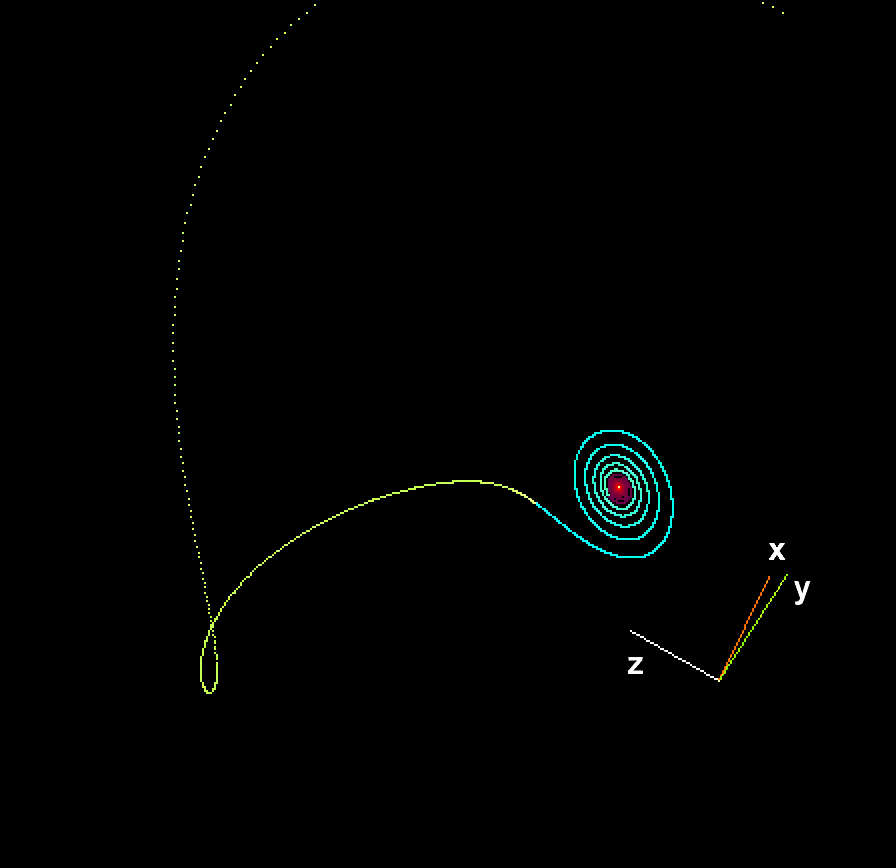

In [76]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\lorenz2 1_waifu2x_art_noise1_scale.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\lorenz2 1_waifu2x_art_noise1_scale.png') 

1/1 [==============================] - 0s 50ms/step
This image most likely belongs to lorenz zx with a 97.65 percent confidence.


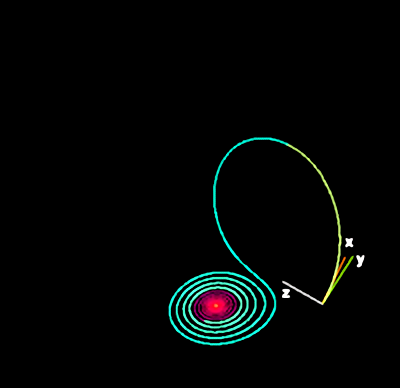

In [77]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\lorenz2 2_waifu2x_art_noise1_scale.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\lorenz2 2_waifu2x_art_noise1_scale.png') 

1/1 [==============================] - 0s 53ms/step
This image most likely belongs to lorenz2 xy with a 78.22 percent confidence.


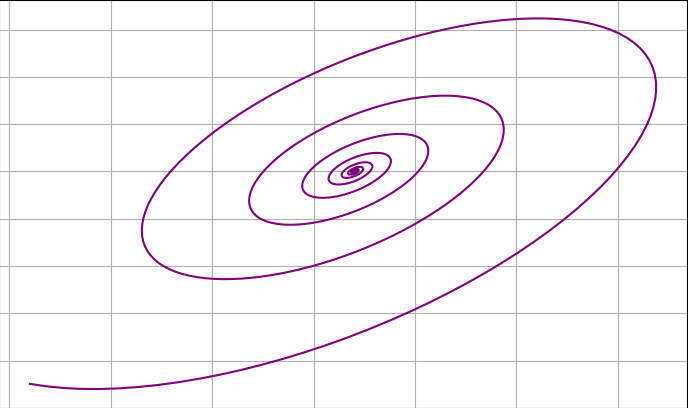

In [78]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\lorenz2 4.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\lorenz2 4.png') 

1/1 [==============================] - 0s 50ms/step
This image most likely belongs to lorenz2 xy with a 86.68 percent confidence.


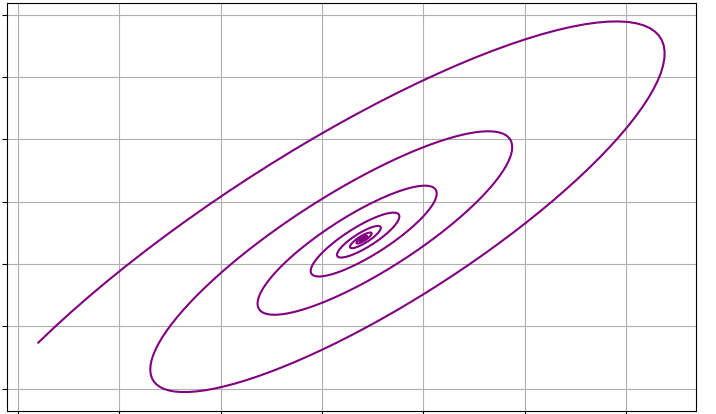

In [79]:
img = tf.keras.utils.load_img(
    'C:\\Users\\icosane\\Desktop\\New folder\\test\\lorenz2 3.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
from IPython.display import Image
Image(filename='C:\\Users\\icosane\\Desktop\\New folder\\test\\lorenz2 3.png') 